# Proyek Analisis Data: Air Quality Dataset
- Nama: Harvest Ecclesiano Christ Walukow
- Email: harvest0805@gmail.com
- Id Dicoding: harvestwalukow

## Menentukan Pertanyaan Bisnis

- Dalam rentang waktu 1 Maret 2013 hingga 28 February  2017, stasiun manakah yang memiliki konsentrasi rata-rata PM2.5 tertinggi?
- Bagaimana tren kualitas udara di Aotizhongxin pada awal tahun 2017?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
aotizhongxin_df = pd.read_csv("https://raw.githubusercontent.com/harvestwalukow/airquality/master/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
changping_df = pd.read_csv("https://raw.githubusercontent.com/harvestwalukow/airquality/master/PRSA_Data_Changping_20130301-20170228.csv")
dingling_df = pd.read_csv("https://raw.githubusercontent.com/harvestwalukow/airquality/master/PRSA_Data_Dingling_20130301-20170228.csv")
dongsi_df = pd.read_csv("https://raw.githubusercontent.com/harvestwalukow/airquality/master/PRSA_Data_Dongsi_20130301-20170228.csv")
guanyuan_df = pd.read_csv("https://raw.githubusercontent.com/harvestwalukow/airquality/master/PRSA_Data_Guanyuan_20130301-20170228.csv")
gucheng_df = pd.read_csv("https://raw.githubusercontent.com/harvestwalukow/airquality/master/PRSA_Data_Gucheng_20130301-20170228.csv")
huairou_df = pd.read_csv("https://raw.githubusercontent.com/harvestwalukow/airquality/master/PRSA_Data_Huairou_20130301-20170228.csv")
nongzhanguan_df = pd.read_csv("https://raw.githubusercontent.com/harvestwalukow/airquality/master/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
shunyi_df = pd.read_csv("https://raw.githubusercontent.com/harvestwalukow/airquality/master/PRSA_Data_Shunyi_20130301-20170228.csv")
tiantan_df = pd.read_csv("https://raw.githubusercontent.com/harvestwalukow/airquality/master/PRSA_Data_Tiantan_20130301-20170228.csv")
wanliu_df = pd.read_csv("https://raw.githubusercontent.com/harvestwalukow/airquality/master/PRSA_Data_Wanliu_20130301-20170228.csv")
wanshouxigong_df = pd.read_csv("https://raw.githubusercontent.com/harvestwalukow/airquality/master/PRSA_Data_Wanshouxigong_20130301-20170228.csv")

### Assessing Data

#### Aotizhongxin

In [3]:
aotizhongxin_df.info()
print("Jumlah missing values: ", aotizhongxin_df.isna().sum())
print("Jumlah duplikasi: ", aotizhongxin_df.duplicated().sum())
aotizhongxin_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah missing values:  No            0
year          0
month       

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


#### Changping

In [4]:
changping_df.info()
print("Jumlah missing values: ", changping_df.isna().sum())
print("Jumlah duplikasi: ", changping_df.duplicated().sum())
changping_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah missing values:  No            0
year          0
month       

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


#### Dingling

In [5]:
dingling_df.info()
print("Jumlah missing values: ", dingling_df.isna().sum())
print("Jumlah duplikasi: ", dingling_df.duplicated().sum())
dingling_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah missing values:  No            0
year          0
month       

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


#### Dongsi

In [6]:
dongsi_df.info()
print("Jumlah missing values: ", dongsi_df.isna().sum())
print("Jumlah duplikasi: ",  dongsi_df.duplicated().sum())
dongsi_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah missing values:  No            0
year          0
month       

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


#### Guanyuan

In [7]:
guanyuan_df.info()
print("Jumlah missing values: ", guanyuan_df.isna().sum())
print("Jumlah duplikasi: ",  guanyuan_df.duplicated().sum())
guanyuan_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah missing values:  No            0
year          0
month       

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


#### Gucheng

In [8]:
gucheng_df.info()
print("Jumlah missing values: ", gucheng_df.isna().sum())
print("Jumlah duplikasi: ",  gucheng_df.duplicated().sum())
gucheng_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah missing values:  No            0
year          0
month       

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34418.000000,34683.000000,34557.000000,34396.000000,33663.000000,34335.000000,35013.000000,35014.000000,35013.000000,35021.000000,35022.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.864524,1008.829592,2.610442,0.064453,1.343310
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.796445,96.742626,21.204526,36.473860,1208.957772,57.019587,11.292857,10.103256,13.782991,0.838654,1.151064
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-8.900000,0.000000,0.600000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.750000,167.000000,20.000000,79.000000,1600.000000,83.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,770.000000,994.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,12.000000


#### Huairou

In [9]:
huairou_df.info()
print("Jumlah missing values: ", huairou_df.isna().sum())
print("Jumlah duplikasi: ",  huairou_df.duplicated().sum())
huairou_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah missing values:  No            0
year          0
month       

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34111.000000,34287.000000,34084.000000,33425.000000,33642.000000,33913.000000,35013.000000,35011.000000,35011.000000,35009.000000,35015.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713,12.445426,1007.598568,2.238619,0.067940,1.652021
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.224916,83.289578,18.896912,26.489531,898.738241,54.605746,11.751103,10.022101,14.052541,0.849046,1.199143
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,28.000000,2.000000,12.000000,400.000000,18.000000,2.100000,999.300000,-9.600000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,49.000000,13.600000,1007.300000,2.700000,0.000000,1.300000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,131.000000,14.000000,46.000000,1300.000000,83.000000,22.300000,1015.500000,15.300000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000,12.900000


#### Nongzhanguan

In [10]:
nongzhanguan_df.info()
print("Jumlah missing values: ", nongzhanguan_df.isna().sum())
print("Jumlah duplikasi: ",  nongzhanguan_df.duplicated().sum())
nongzhanguan_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah missing values:  No            0
year          0
month       

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34436.000000,34624.000000,34618.000000,34372.000000,33858.000000,34558.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.838483,108.991096,18.689242,58.097172,1324.350198,58.534682,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.225344,95.341177,24.280665,36.297740,1245.166124,58.401448,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,9.000000,51.000000,900.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,149.000000,23.000000,80.000000,1600.000000,84.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,995.000000,257.000000,273.000000,10000.000000,390.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


#### Shunyi

In [11]:
shunyi_df.info()
print("Jumlah missing values: ", shunyi_df.isna().sum())
print("Jumlah duplikasi: ",  shunyi_df.duplicated().sum())
shunyi_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah missing values:  No            0
year          0
month       

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


#### Tiantan

In [12]:
tiantan_df.info()
print("Jumlah missing values: ", tiantan_df.isna().sum())
print("Jumlah duplikasi: ",  tiantan_df.duplicated().sum())
tiantan_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah missing values:  No            0
year          0
month       

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.921384,89.700157,20.144631,31.946224,1170.593297,59.081528,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


#### Wanliu

In [13]:
wanliu_df.info()
print("Jumlah missing values: ", wanliu_df.isna().sum())
print("Jumlah duplikasi: ",  wanliu_df.duplicated().sum())
wanliu_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah missing values:  No            0
year          0
month       

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34682.000000,34780.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.374716,110.464618,18.376481,65.258789,1319.353513,48.873614,13.428865,1011.097536,3.266588,0.068263,1.501215
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.905568,92.795065,22.609648,37.996088,1268.114331,55.111740,11.346931,10.355247,13.678060,0.896726,1.104472
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-15.800000,985.900000,-34.900000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,4.000000,36.000000,500.000000,4.000000,3.200000,1002.500000,-8.100000,0.000000,0.800000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,88.000000,10.000000,60.000000,900.000000,32.000000,14.300000,1010.800000,4.000000,0.000000,1.200000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,153.000000,23.000000,88.000000,1600.000000,73.000000,22.900000,1019.400000,15.800000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,957.000000,951.000000,282.000000,264.000000,10000.000000,364.000000,40.500000,1040.300000,28.500000,72.500000,11.200000


#### Wanshouxigong

In [14]:
wanshouxigong_df.info()
print("Jumlah missing values: ", wanshouxigong_df.isna().sum())
print("Jumlah duplikasi: ",  wanshouxigong_df.duplicated().sum())
wanshouxigong_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
Jumlah missing values:  No            0
year          0
month       

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34368.000000,34580.000000,34395.000000,34310.00000,33767.000000,33986.000000,35045.000000,35045.000000,35045.000000,35045.000000,35051.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.024136,112.223459,17.148603,55.52956,1370.395031,56.229904,13.784477,1011.511804,2.707442,0.064320,1.745314
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.975981,97.593210,23.940834,35.80805,1223.139114,57.082710,11.385156,10.570928,13.704139,0.796981,1.206355
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.00000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.00000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.00000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.00000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,961.000000,411.000000,251.00000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


### Cleaning Data

#### Aotizhongxin

In [15]:
aotizhongxin_df[aotizhongxin_df['PM2.5'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
1509,1510,2013,5,2,21,NaN,183.0,63.0000,93.0000,1200.0,38.0000,18.5,1006.1,6.0,0.0,SE,2.8,Aotizhongxin
1837,1838,2013,5,16,13,NaN,98.0,46.0000,35.0000,600.0,166.0000,26.1,1009.9,10.7,0.0,SW,2.7,Aotizhongxin
2368,2369,2013,6,7,16,NaN,137.0,12.0000,74.0000,2500.0,8.0000,20.7,1002.4,19.4,0.0,NNE,0.8,Aotizhongxin
2785,2786,2013,6,25,1,NaN,35.0,3.1416,35.1063,NaN,60.6186,20.8,996.5,20.5,0.0,NE,0.2,Aotizhongxin
2808,2809,2013,6,26,0,NaN,183.0,64.2600,40.0335,NaN,NaN,21.7,993.0,21.2,0.0,NNW,0.4,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34880,34881,2017,2,21,8,NaN,NaN,NaN,NaN,NaN,NaN,-0.3,1028.8,-15.8,0.0,SSE,1.0,Aotizhongxin
34883,34884,2017,2,21,11,NaN,NaN,NaN,NaN,NaN,NaN,1.3,1028.0,-16.1,0.0,S,1.5,Aotizhongxin
34885,34886,2017,2,21,13,NaN,NaN,NaN,NaN,NaN,NaN,-2.1,1027.4,-4.1,0.7,WSW,3.2,Aotizhongxin
35028,35029,2017,2,27,12,NaN,NaN,NaN,NaN,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Aotizhongxin


In [16]:
aotizhongxin_df['PM2.5'].value_counts()

9.0      600
10.0     590
12.0     576
11.0     570
8.0      563
        ... 
444.0      1
505.0      1
565.0      1
587.0      1
462.0      1
Name: PM2.5, Length: 545, dtype: int64

In [17]:
aotizhongxin_df['PM2.5'].fillna(value=int(9), inplace=True)
aotizhongxin_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [18]:
aotizhongxin_df[aotizhongxin_df['PM10'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
204,205,2013,3,9,12,78.0,NaN,10.0,10.0,300.0,68.0,12.4,1004.3,-14.4,0.0,NW,7.9,Aotizhongxin
2949,2950,2013,7,1,21,85.0,NaN,12.0,79.0,2100.0,4.0,24.0,990.3,23.3,5.7,N,0.6,Aotizhongxin
3133,3134,2013,7,9,13,52.0,NaN,6.0,50.0,700.0,48.0,23.7,997.9,22.9,2.2,NE,1.4,Aotizhongxin
4513,4514,2013,9,5,1,24.0,NaN,1.0,35.0,400.0,49.0,17.9,1009.6,17.6,1.1,NNE,1.0,Aotizhongxin
4706,4707,2013,9,13,2,61.0,NaN,2.0,35.0,500.0,54.0,18.9,1002.3,17.4,0.0,SSW,1.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34880,34881,2017,2,21,8,9.0,NaN,NaN,NaN,NaN,NaN,-0.3,1028.8,-15.8,0.0,SSE,1.0,Aotizhongxin
34883,34884,2017,2,21,11,9.0,NaN,NaN,NaN,NaN,NaN,1.3,1028.0,-16.1,0.0,S,1.5,Aotizhongxin
34885,34886,2017,2,21,13,9.0,NaN,NaN,NaN,NaN,NaN,-2.1,1027.4,-4.1,0.7,WSW,3.2,Aotizhongxin
35028,35029,2017,2,27,12,9.0,NaN,NaN,NaN,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Aotizhongxin


In [19]:
aotizhongxin_df['PM10'].value_counts()

6.0      345
18.0     322
22.0     313
14.0     299
15.0     296
        ... 
812.0      1
757.0      1
862.0      1
845.0      1
754.0      1
Name: PM10, Length: 633, dtype: int64

In [20]:
aotizhongxin_df['PM10'].fillna(value=int(6), inplace=True)
aotizhongxin_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10          0
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

##### Untuk melihat tren kualitas udara di Aotizhongxin, kita hanya memerlukan PM2.5 dan PM10. Dari beberapa sumber, keduanya dianggap sebagai parameter utama dalam mengukur kualitas udara karena berdampak sangat besar pada respirasi manusia. Selanjutnya, untuk stasiun lain kita hanya akan melakukan cleaning pada kolom PM2.5, sesuai dengan yang diminta dalam pertanyaan bisnis.

#### Changping

In [21]:
changping_df['PM2.5'].value_counts()

11.0     706
12.0     699
3.0      690
10.0     687
13.0     682
        ... 
79.5       1
112.4      1
341.0      1
393.0      1
527.0      1
Name: PM2.5, Length: 481, dtype: int64

In [22]:
changping_df['PM2.5'].fillna(value=int(11), inplace=True)
changping_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

#### Dingling

In [23]:
dingling_df['PM2.5'].value_counts()

3.0      1250
7.0       797
9.0       782
6.0       781
8.0       772
         ... 
8.5         1
4.3         1
384.0       1
72.4        1
396.0       1
Name: PM2.5, Length: 486, dtype: int64

In [24]:
dingling_df['PM2.5'].fillna(value=int(3), inplace=True)
dingling_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

#### Dongsi

In [25]:
dongsi_df['PM2.5'].value_counts()

3.0      892
10.0     545
8.0      524
12.0     517
9.0      504
        ... 
684.0      1
628.0      1
640.0      1
538.0      1
681.0      1
Name: PM2.5, Length: 582, dtype: int64

In [26]:
dongsi_df['PM2.5'].fillna(value=int(3), inplace=True)
dongsi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

#### Guanyuan

In [27]:
guanyuan_df['PM2.5'].value_counts()

11.0     574
12.0     566
10.0     550
14.0     538
9.0      517
        ... 
136.2      1
256.9      1
477.0      1
14.3       1
663.0      1
Name: PM2.5, Length: 557, dtype: int64

In [28]:
guanyuan_df['PM2.5'].fillna(value=int(11), inplace=True)
guanyuan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

#### Gucheng

In [29]:
gucheng_df['PM2.5'].value_counts()

8.0      563
11.0     544
9.0      534
10.0     526
7.0      505
        ... 
741.0      1
733.0      1
675.0      1
606.0      1
464.0      1
Name: PM2.5, Length: 577, dtype: int64

In [30]:
gucheng_df['PM2.5'].fillna(value=int(8), inplace=True)
gucheng_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

#### Huairou

In [31]:
huairou_df['PM2.5'].value_counts()

3.0      1092
8.0       625
9.0       605
7.0       599
10.0      599
         ... 
361.0       1
55.7        1
81.8        1
83.7        1
556.0       1
Name: PM2.5, Length: 479, dtype: int64

In [32]:
huairou_df['PM2.5'].fillna(value=int(3), inplace=True)
huairou_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64

#### Nongzhanguan

In [33]:
nongzhanguan_df['PM2.5'].value_counts()

3.0      693
10.0     584
9.0      560
8.0      555
11.0     544
        ... 
100.9      1
74.5       1
91.7       1
81.7       1
529.0      1
Name: PM2.5, Length: 565, dtype: int64

In [34]:
nongzhanguan_df['PM2.5'].fillna(value=int(3), inplace=True)
nongzhanguan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

#### Shunyi

In [35]:
shunyi_df['PM2.5'].value_counts()

3.0      824
8.0      637
10.0     624
9.0      591
7.0      577
        ... 
445.0      1
467.0      1
428.0      1
443.0      1
593.0      1
Name: PM2.5, Length: 567, dtype: int64

In [36]:
shunyi_df['PM2.5'].fillna(value=int(3), inplace=True)
shunyi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

#### Tiantan

In [37]:
tiantan_df['PM2.5'].value_counts()

3.0      633
9.0      577
11.0     576
10.0     565
12.0     542
        ... 
68.6       1
145.8      1
441.0      1
460.0      1
594.0      1
Name: PM2.5, Length: 545, dtype: int64

In [38]:
tiantan_df['PM2.5'].fillna(value=int(3), inplace=True)
tiantan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

#### Wanliu

In [39]:
wanliu_df['PM2.5'].value_counts()

3.0      691
10.0     503
8.0      501
11.0     486
12.0     480
        ... 
20.7       1
508.0      1
421.0      1
85.2       1
625.0      1
Name: PM2.5, Length: 539, dtype: int64

In [40]:
wanliu_df['PM2.5'].fillna(value=int(3), inplace=True)
wanliu_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64

#### Wanshouxigong

In [41]:
wanshouxigong_df['PM2.5'].value_counts()

3.0      735
10.0     553
11.0     545
9.0      540
12.0     507
        ... 
448.0      1
424.0      1
106.4      1
8.8        1
654.0      1
Name: PM2.5, Length: 585, dtype: int64

In [42]:
wanshouxigong_df['PM2.5'].fillna(value=int(3), inplace=True)
wanshouxigong_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

## Exploratory Data Analysis (EDA)

#### Explore Data Aotizhongxin

In [43]:
# Mencari rata-rata kandungan PM2.5 (per hour) di Stasiun Aotizhongxin
aotizhongxin_df['PM2.5'].describe()

count    35064.000000
mean        80.827438
std         81.902935
min          3.000000
25%         20.000000
50%         56.000000
75%        112.000000
max        898.000000
Name: PM2.5, dtype: float64

In [44]:
# Untuk menjawab pertanyaan bisnis kedua, kita akan memanggil data pada tahun 2017
aotizhongxin_df_2017 = aotizhongxin_df[aotizhongxin_df['year'] == 2017]
aotizhongxin_df_2017

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
33648,33649,2017,1,1,0,485.0,496.0,8.0,121.0,6100.0,4.0,-4.7,1022.1,-6.1,0.0,ENE,1.0,Aotizhongxin
33649,33650,2017,1,1,1,477.0,497.0,7.0,113.0,6300.0,4.0,-5.2,1022.3,-6.4,0.0,E,0.7,Aotizhongxin
33650,33651,2017,1,1,2,454.0,469.0,7.0,111.0,6200.0,4.0,-5.4,1022.5,-6.5,0.0,ENE,1.1,Aotizhongxin
33651,33652,2017,1,1,3,418.0,425.0,6.0,109.0,5900.0,3.0,-5.2,1022.5,-6.2,0.0,E,1.1,Aotizhongxin
33652,33653,2017,1,1,4,438.0,468.0,10.0,123.0,7700.0,16.0,-5.0,1021.9,-5.8,0.0,ENE,1.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


In [45]:
aotizhongxin_df_2017.groupby(by="month").agg({
    "PM2.5": ["max", "min", "mean", "std"]
})

# Secara umum kita dapat melihat data kualitas udara di Stasiun Aotizhongxin pada awal tahun 2017

PM2.5                             
         max  min        mean         std
month                                    
1      713.0  3.0  115.362903  133.153086
2      359.0  3.0   69.912202   83.342861

In [46]:
# Analisis data tahun 2017 di bulan pertama
aotizhongxin_df_2017_month1 = aotizhongxin_df_2017[aotizhongxin_df_2017['month'] == 1]
aotizhongxin_df_2017_month1

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
33648,33649,2017,1,1,0,485.0,496.0,8.0,121.0,6100.0,4.0,-4.7,1022.1,-6.1,0.0,ENE,1.0,Aotizhongxin
33649,33650,2017,1,1,1,477.0,497.0,7.0,113.0,6300.0,4.0,-5.2,1022.3,-6.4,0.0,E,0.7,Aotizhongxin
33650,33651,2017,1,1,2,454.0,469.0,7.0,111.0,6200.0,4.0,-5.4,1022.5,-6.5,0.0,ENE,1.1,Aotizhongxin
33651,33652,2017,1,1,3,418.0,425.0,6.0,109.0,5900.0,3.0,-5.2,1022.5,-6.2,0.0,E,1.1,Aotizhongxin
33652,33653,2017,1,1,4,438.0,468.0,10.0,123.0,7700.0,16.0,-5.0,1021.9,-5.8,0.0,ENE,1.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34387,34388,2017,1,31,19,91.0,101.0,36.0,75.0,1400.0,75.0,1.0,1024.2,-20.7,0.0,WSW,1.8,Aotizhongxin
34388,34389,2017,1,31,20,73.0,73.0,30.0,88.0,1500.0,46.0,-0.6,1025.2,-19.2,0.0,NW,0.9,Aotizhongxin
34389,34390,2017,1,31,21,24.0,24.0,13.0,27.0,700.0,76.0,1.9,1026.4,-22.1,0.0,NNE,1.7,Aotizhongxin
34390,34391,2017,1,31,22,10.0,31.0,5.0,17.0,400.0,80.0,2.2,1027.5,-22.6,0.0,NNW,2.9,Aotizhongxin


In [47]:
aotizhongxin_df_2017_month1.groupby(by="day").agg({
    "PM2.5": ["max", "min", "mean", "std"]
})

PM2.5                               
       max    min        mean         std
day                                      
1    568.0  381.0  464.083333   51.784601
2    453.0   16.0  173.833333  136.267214
3    483.0  155.0  292.458333   93.931047
4    500.0  167.0  368.166667   85.866766
5    336.0  159.0  219.041667   47.937894
6    239.0  158.0  197.416667   25.058049
7    241.0   78.0  155.250000   51.060280
8     66.0   10.0   21.916667   14.218533
9    127.0    6.0   33.666667   38.965611
10    91.0    3.0   24.625000   32.054047
11   112.0    3.0   49.333333   30.714204
12   121.0   15.0   46.375000   34.324301
13    22.0    5.0   14.166667    5.155551
14    44.0    8.0   22.416667   10.446204
15    85.0   17.0   48.500000   21.186542
16   138.0   60.0   98.541667   22.358695
17   172.0  111.0  148.041667   17.962471
18    73.0   20.0   39.958333   15.760377
19   126.0    8.0   48.416667   45.273004
20    64.0    5.0   21.500000   16.105630
21    90.0    5.0   27.166667   30.835703
22    72.0    9.0   24.166667   17.061695
23    95.0   11.0   31.750000   25.034324
24   134.0   27.0   87.458333   34.633459
25   253.0    9.0  173.541667   47.885715
26   326.0    4.0  167.583333  130.170095
27   278.0    6.0   58.375000   74.049227
28   713.0  238.0  379.000000  175.952316
29   297.0    3.0   41.416667   87.389143
30   126.0    3.0   25.291667   31.978905
31   104.0    3.0   72.791667   27.008822

In [48]:
table_2017_1_1_df=aotizhongxin_df_2017_month1.groupby(by="day").agg({
    "PM2.5": ["mean"]
})
table_2017_1_1_df

,PM2.5
,mean
day,
1,464.083333
2,173.833333
3,292.458333
4,368.166667
5,219.041667
6,197.416667
7,155.250000
8,21.916667


In [49]:
# Rata-rata kandungan PM2.5 per jam, di setiap minggu bulan Januari 2017
print(table_2017_1_1_df.loc[1:7].mean())
print(table_2017_1_1_df.loc[8:14].mean())
print(table_2017_1_1_df.loc[15:21].mean())
print(table_2017_1_1_df.loc[22:31].mean())

PM2.5  mean    267.178571
dtype: float64
PM2.5  mean    30.357143
dtype: float64
PM2.5  mean    61.732143
dtype: float64
PM2.5  mean    106.1375
dtype: float64


In [50]:
aotizhongxin_df_2017_month1.groupby(by="day").agg({
    "PM10": ["max", "min", "mean", "std"]
})

PM10                               
       max    min        mean         std
day                                      
1    578.0  381.0  479.333333   48.463044
2    520.0   16.0  194.416667  150.443090
3    486.0  155.0  298.750000  100.637641
4    561.0  167.0  381.333333  102.365783
5    401.0  159.0  228.083333   64.348857
6    239.0  158.0  197.416667   25.058049
7    241.0   78.0  155.250000   51.060280
8     66.0   10.0   21.916667   14.218533
9    132.0    6.0   38.333333   43.183800
10   108.0    6.0   33.166667   39.761973
11   150.0    6.0   62.500000   37.449096
12   136.0   25.0   62.750000   32.865007
13    40.0   12.0   27.125000    7.249063
14    84.0   10.0   37.625000   21.031679
15    96.0   35.0   60.916667   21.566715
16   143.0   60.0  103.208333   21.498188
17   174.0  120.0  151.541667   16.471264
18    80.0   21.0   51.583333   20.540346
19   149.0   14.0   86.416667   40.965433
20    80.0    9.0   30.208333   21.120728
21   112.0   14.0   48.250000   29.392768
22    98.0   11.0   32.708333   22.408227
23   118.0   14.0   39.416667   31.835060
24   137.0   27.0   94.250000   34.961159
25   253.0    6.0  174.166667   48.227420
26   326.0    5.0  177.458333  120.702285
27   329.0    6.0   76.083333   93.582754
28   858.0  249.0  435.166667  225.947410
29   314.0   10.0   74.791667   83.572920
30   130.0    5.0   29.875000   33.833753
31   104.0   24.0   77.625000   24.017770

In [51]:
table_2017_1_2_df=aotizhongxin_df_2017_month1.groupby(by="day").agg({
    "PM10": ["mean"]
})
table_2017_1_2_df

,PM10
,mean
day,
1,479.333333
2,194.416667
3,298.750000
4,381.333333
5,228.083333
6,197.416667
7,155.250000
8,21.916667


In [52]:
# Rata-rata kandungan PM10 per jam, di setiap minggu bulan Januari 2017
print(table_2017_1_2_df.loc[1:7].mean())
print(table_2017_1_2_df.loc[8:14].mean())
print(table_2017_1_2_df.loc[15:21].mean())
print(table_2017_1_2_df.loc[22:31].mean())

PM10  mean    276.369048
dtype: float64
PM10  mean    40.488095
dtype: float64
PM10  mean    76.017857
dtype: float64
PM10  mean    121.154167
dtype: float64


In [53]:
# Analisis data tahun 2017 di bulan kedua
aotizhongxin_df_2017_month2 = aotizhongxin_df_2017[aotizhongxin_df_2017['month'] == 2]
aotizhongxin_df_2017_month2

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
34392,34393,2017,2,1,0,5.0,18.0,4.0,13.0,400.0,77.0,0.3,1029.4,-22.0,0.0,NNE,2.3,Aotizhongxin
34393,34394,2017,2,1,1,5.0,21.0,2.0,10.0,400.0,79.0,-0.4,1030.1,-22.5,0.0,NNE,3.0,Aotizhongxin
34394,34395,2017,2,1,2,7.0,21.0,5.0,11.0,400.0,73.0,-1.9,1031.0,-22.5,0.0,N,1.5,Aotizhongxin
34395,34396,2017,2,1,3,6.0,23.0,7.0,12.0,400.0,71.0,-1.9,1031.6,-23.1,0.0,NE,1.8,Aotizhongxin
34396,34397,2017,2,1,4,8.0,21.0,8.0,11.0,400.0,81.0,-3.3,1032.3,-21.5,0.0,ENE,1.8,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


In [54]:
aotizhongxin_df_2017_month2.groupby(by="day").agg({
    "PM2.5": ["max", "min", "mean", "std"]
})

PM2.5                               
       max    min        mean         std
day                                      
1    146.0    3.0   29.083333   44.305183
2    156.0   31.0   84.541667   44.726200
3    319.0   63.0  161.375000   78.526546
4    359.0    8.0  260.166667  110.829154
5     20.0    7.0   11.875000    4.455700
6     38.0    3.0   11.250000   10.468379
7    118.0   38.0   77.458333   24.986917
8    118.0    6.0   37.583333   46.017876
9     11.0    3.0    7.083333    2.104171
10    13.0    3.0    7.041667    2.235663
11   237.0    3.0   42.375000   60.658569
12   220.0   30.0  104.458333   46.499162
13   198.0   14.0   92.916667   66.888562
14   260.0  137.0  182.833333   37.960697
15   285.0    3.0  227.625000   73.004355
16   299.0    4.0  121.541667  128.797103
17    64.0    5.0   20.166667   20.632744
18   123.0   56.0   82.500000   15.151410
19   195.0    5.0  109.250000   74.908785
20    28.0    3.0    9.666667    6.748054
21   102.0    9.0   39.666667   29.705316
22   147.0   10.0   79.500000   48.693362
23    45.0    3.0   16.833333    9.698349
24    48.0    9.0   21.541667   10.628015
25    25.0    3.0   11.208333    4.634269
26    51.0   18.0   28.125000    8.614005
27   122.0    9.0   66.708333   27.269156
28    56.0    5.0   13.166667    9.976785

In [55]:
table_2017_2_1_df=aotizhongxin_df_2017_month2.groupby(by="day").agg({
    "PM2.5": ["mean"]
})
table_2017_2_1_df

,PM2.5
,mean
day,
1,29.083333
2,84.541667
3,161.375000
4,260.166667
5,11.875000
6,11.250000
7,77.458333
8,37.583333


In [56]:
# Rata-rata kandungan PM2.5 per jam, di setiap minggu bulan Februari 2017
print(table_2017_2_1_df.loc[1:7].mean())
print(table_2017_2_1_df.loc[8:14].mean())
print(table_2017_2_1_df.loc[15:21].mean())
print(table_2017_2_1_df.loc[22:28].mean())

PM2.5  mean    90.821429
dtype: float64
PM2.5  mean    67.755952
dtype: float64
PM2.5  mean    87.202381
dtype: float64
PM2.5  mean    33.869048
dtype: float64


In [57]:
aotizhongxin_df_2017_month2.groupby(by="day").agg({
    "PM10": ["max", "min", "mean", "std"]
})

PM10                               
       max    min        mean         std
day                                      
1    193.0    8.0   47.583333   58.873421
2    162.0   34.0   91.666667   49.585821
3    323.0   63.0  166.875000   81.380113
4    359.0    8.0  262.833333  111.542414
5     27.0    7.0   14.291667    5.344474
6     53.0    5.0   20.125000   16.749594
7    121.0   38.0   88.083333   26.642426
8    124.0   12.0   52.083333   41.064019
9     32.0    6.0   17.375000    8.128386
10    34.0   10.0   22.000000    5.912404
11   282.0    6.0   62.500000   80.727130
12   307.0   33.0  128.833333   58.800079
13   243.0   14.0  112.791667   79.212965
14   260.0  137.0  186.291667   35.230273
15   285.0    3.0  227.708333   72.737455
16   299.0   20.0  136.666667  116.091293
17   103.0    6.0   37.875000   34.110195
18   149.0   86.0  110.291667   16.176954
19   198.0   56.0  141.000000   41.176186
20    51.0    6.0   27.750000   14.450064
21   155.0    6.0   43.750000   38.767142
22   147.0   11.0   80.833333   46.888088
23    55.0    3.0   24.416667   14.252129
24    70.0   13.0   32.625000   15.044319
25    36.0    7.0   19.708333    8.227627
26    82.0   19.0   40.708333   14.736760
27   150.0    6.0   87.458333   34.351102
28    56.0    5.0   23.291667   12.073972

In [58]:
table_2017_2_2_df=aotizhongxin_df_2017_month2.groupby(by="day").agg({
    "PM10": ["mean"]
})
table_2017_2_2_df

,PM10
,mean
day,
1,47.583333
2,91.666667
3,166.875000
4,262.833333
5,14.291667
6,20.125000
7,88.083333
8,52.083333


In [59]:
# Rata-rata kandungan PM10 per jam, di setiap minggu bulan Februari 2017
print(table_2017_2_2_df.loc[1:7].mean())
print(table_2017_2_2_df.loc[8:14].mean())
print(table_2017_2_2_df.loc[15:21].mean())
print(table_2017_2_2_df.loc[22:28].mean())

PM10  mean    98.779762
dtype: float64
PM10  mean    83.125
dtype: float64
PM10  mean    103.577381
dtype: float64
PM10  mean    44.14881
dtype: float64


### Tren Kualitas Udara Aotizhongxin di Awal Tahun 2017 

In [60]:
data = {
    'Minggu ke-': [1, 2, 3, 4, 5, 6, 7, 8],
    'PM2.5': [267.178571, 30.357143, 61.732143, 106.1375, 90.821429, 67.755952, 87.202381, 33.869048],
    'PM10': [276.369048, 40.488095, 76.017857, 121.154167, 98.779762, 83.125, 103.577381, 44.14881]
}

tren_aotizhongxin = pd.DataFrame(data)
tren_aotizhongxin.set_index('Minggu ke-', inplace=True)
tren_aotizhongxin

,PM2.5,PM10
Minggu ke-,,
1,267.178571,276.369048
2,30.357143,40.488095
3,61.732143,76.017857
4,106.137500,121.154167
5,90.821429,98.779762
6,67.755952,83.125000
7,87.202381,103.577381
8,33.869048,44.148810


#### Explore Data Kualitas Udara di Semua Stasiun 1 Maret 2013 - 28 February  2017

In [61]:
# Mencari rata-rata kandungan PM2.5 (per hour)
mean_values = {
    'Aotizhongxin': aotizhongxin_df['PM2.5'].describe().loc['mean'],
    'Changping': changping_df['PM2.5'].describe().loc['mean'],
    'Dingling': dingling_df['PM2.5'].describe().loc['mean'],
    'Dongsi': dongsi_df['PM2.5'].describe().loc['mean'],
    'Guanyuan': guanyuan_df['PM2.5'].describe().loc['mean'],
    'Gucheng': gucheng_df['PM2.5'].describe().loc['mean'],
    'Huairou': huairou_df['PM2.5'].describe().loc['mean'],
    'Nongzhuan': nongzhanguan_df['PM2.5'].describe().loc['mean'],
    'Shunyi': shunyi_df['PM2.5'].describe().loc['mean'],
    'Tiantan': tiantan_df['PM2.5'].describe().loc['mean'],
    'Wanliu': wanliu_df['PM2.5'].describe().loc['mean'],
    'Wanshouxigong': wanshouxigong_df['PM2.5'].describe().loc['mean']
}

tabel_mean = pd.DataFrame(list(mean_values.items()), columns=['Stasiun', 'Mean PM2.5'])
tabel_mean.set_index('Stasiun', inplace=True)
tabel_mean

,Mean PM2.5
Stasiun,
Aotizhongxin,80.827438
Changping,69.773106
Dingling,64.590090
Dongsi,84.414816
Guanyuan,81.669655
Gucheng,82.454632
Huairou,67.815537
Nongzhuan,83.372747
Shunyi,77.499906


In [62]:
tabel_mean.describe()

,Mean PM2.5
count,12.000000
mean,78.245787
std,6.864839
min,64.590090
25%,75.568206
50%,81.248547
75%,82.717500
max,84.414816


## Visualization & Explanatory Analysis

### Pertanyaan 1: 

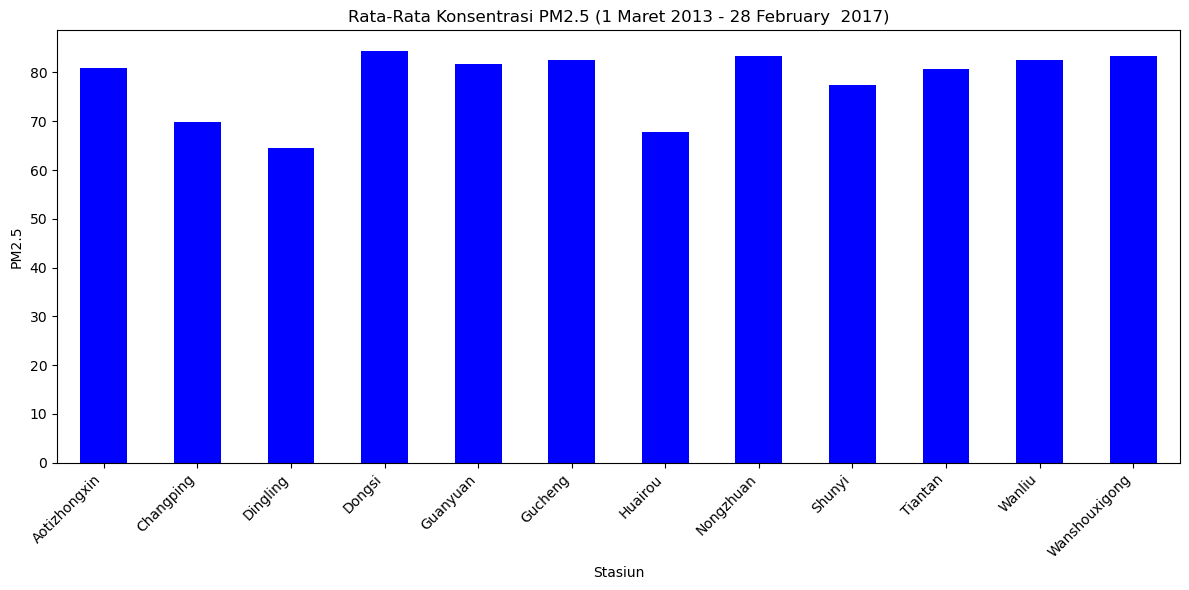

In [63]:
plt.figure(figsize=(12, 6))
tabel_mean['Mean PM2.5'].plot(kind='bar', color='blue')
plt.title('Rata-Rata Konsentrasi PM2.5 (1 Maret 2013 - 28 February  2017)')
plt.xlabel('Stasiun')
plt.ylabel('PM2.5')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

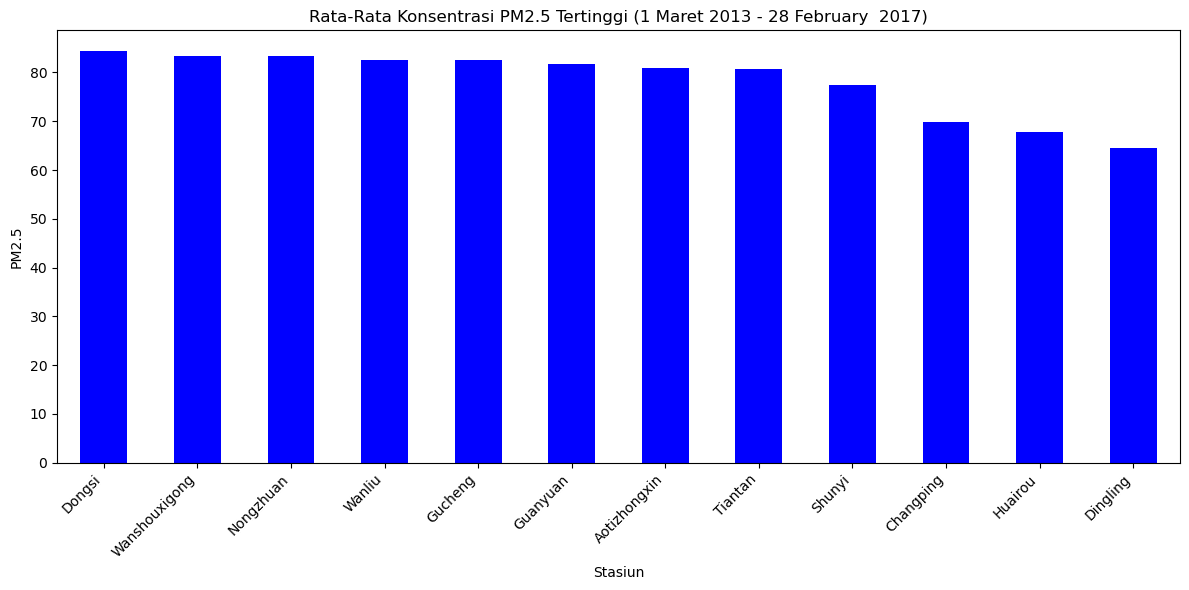

In [64]:
# Mengurutkan untuk mencari rata-rata tertinggi
urut_tabel_mean=tabel_mean.sort_values(by='Mean PM2.5', ascending=False)

plt.figure(figsize=(12, 6))
urut_tabel_mean['Mean PM2.5'].plot(kind='bar', color='blue')
plt.title('Rata-Rata Konsentrasi PM2.5 Tertinggi (1 Maret 2013 - 28 February  2017)')
plt.xlabel('Stasiun')
plt.ylabel('PM2.5')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

### Pertanyaan 2: 

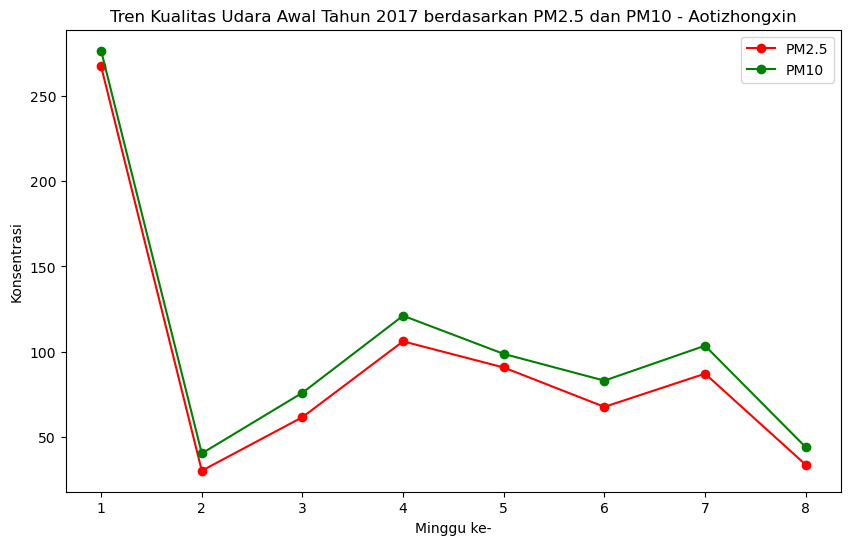

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(tren_aotizhongxin.index, tren_aotizhongxin['PM2.5'], marker='o', label='PM2.5', color='red')
plt.plot(tren_aotizhongxin.index, tren_aotizhongxin['PM10'], marker='o', label='PM10', color='green')

plt.xlabel('Minggu ke-')
plt.ylabel('Konsentrasi')
plt.title('Tren Kualitas Udara Awal Tahun 2017 berdasarkan PM2.5 dan PM10 - Aotizhongxin')
plt.legend()

plt.show()

## Conclusion

- Dalam rentang waktu 1 Maret 2013 hingga 28 February  2017, stasiun manakah yang memiliki konsentrasi rata-rata PM2.5 tertinggi?
Berdasarkan analisis yang dilakukan, ditemukan bahwa dalam rentang waktu tersebut konsentrasi rata-rata PM2.5 tertinggi ada pada Stasiun Dongsi dengan 84.414816. Sementara itu, yang terendah adalah Stasiun Dingling dengan 64.590090. Secara keseluruhan, tidak ada perbedaan yang signifikan antara stasiun yang satu dengan yang lainnya, hal ini ditunjukkan oleh standar deviasi yang hanya sebesar 6.864839.

- Bagaimana tren kualitas udara di Aotizhongxin pada awal tahun 2017?
Terlihat bahwa konsentrasi PM2.5 dan PM10 mempunyai grafik yang serupa, minggu pertama di bulan Januari menunjukkan bahwa kualitas udara tidak begitu baik karena konsentrasi PM2.5 dan PM10 berada di atas rata-rata konsentrasi pada bulan tersebut. Di minggu kedua grafik merosot tajam mencapai rata-rata terendahnya, selanjutnya grafik menunjukkan fluktuasi yang cenderung normal di minggu-minggu berikutnya.